# Challenge Básico - Analizar CSV en Databricks "Free Edition"
## Héctor Gabriel Sánchez Pérez

In [0]:
# Cargar el archivo csv que previamente había sido importado en Databricks en una tabla 
df = spark.table("default.globalterrorismdb_0718_dist")
df.show(5)
df.printSchema()

+------------+-----+------+----+----------+--------+----------+-------+------------------+------+--------------------+---------+-------------+---------+----------+-----------+--------+--------+-------+-----+-----+-----+---------+-----------+---------------+--------+-------+-------+-----------+--------------------+-----------+---------------+-----------+---------------+---------+--------------------+------------+--------------------+--------------------+--------------------+-------+------------------+---------+-------------+------------+----------------+-----+-------+-------+-----------+---------+-------------+------------+----------------+-----+-------+-------+-----------+--------------------+--------+------+---------+------+---------+------+-----------+-----------+-----------+----------+------+--------+-------+---------+-------------+------+----------+--------------+------+----------+--------------+---------+---------+-------------+------------+--------------------+---------+---------

In [0]:
# Importamos la librería de Koalas para trabajar con DataFrames de Pandas
import pyspark.pandas as ps
psdf = ps.DataFrame(df)
psdf.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,None,0,None,58,Dominican Republic,2,Central America & Caribbean,None,Santo Domingo,18.456792,-69.951164,1,0,None,None,1,1,1,0,NaN,None,0,1,0,1,Assassination,NaN,None,NaN,None,14,Private Citizens & Property,68,Named Civilian,None,Julio Guzman,58,Dominican Republic,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,MANO-D,None,None,None,None,None,None,0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,0,NaN,NaN,NaN,NaN,None,None,0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,0,0,0,0,None
1,197000000002,1970,0,0,None,0,None,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,None,None,1,1,1,0,NaN,None,0,1,0,6,Hostage Taking (Kidnapping),NaN,None,NaN,None,7,Government (Diplomatic),45,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21,Belgium,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,23rd of September Communist League,None,None,None,None,None,None,0,NaN,NaN,0,7.0,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,1,1.0,0.0,NaN,NaN,None,Mexico,1,800000.0,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,0,1,1,1,None
2,197001000001,1970,1,0,None,0,None,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,None,None,1,1,1,0,NaN,None,0,1,0,1,Assassination,NaN,None,NaN,None,10,Journalists & Media,54,Radio Journalist/Staff/Facility,Voice of America,Employee,217,United States,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Unknown,None,None,None,None,None,None,0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,0,NaN,NaN,NaN,NaN,None,None,0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,-9,-9,1,1,None
3,197001000002,1970,1,0,None,0,None,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,None,None,1,1,1,0,NaN,None,0,1,0,3,Bombing/Explosion,NaN,None,NaN,None,7,Government (Diplomatic),46,Embassy/Consulate,None,U.S. Embassy,217,United States,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Unknown,None,None,None,None,None,None,0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,6,Explosives,16.0,Unknown

### Estadísticas Descriptivas para conocer mejor el Dataset

In [0]:
# Resúmen general de estadísticas numéricas
psdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
country,181691.0,1.319685e+02,1.124145e+02,4.000000e+00,7.800000e+01,9.800000e+01,1.600000e+02,1.004000e+03
region,181691.0,7.160938e+00,2.933408e+00,1.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
latitude,177135.0,2.349834e+01,1.856924e+01,-5.315461e+01,1.150975e+01,3.146746e+01,3.468509e+01,7.463355e+01
longitude,177134.0,-4.586957e+02,2.047790e+05,-8.618590e+07,4.482369e+00,4.324500e+01,6.871033e+01,1.793667e+02
specificity,181685.0,1.451452e+00,9.954295e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [0]:
# Conteo de Valores Nulos por columna
psdf.isnull().sum().sort_values(ascending=False)

/databricks/python/lib/python3.12/site-packages/pyspark/pandas/generic.py:1373: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  warnings.warn(


gsubname3             181671
weapsubtype4          181621
weapsubtype4_txt      181621
weaptype4             181618
weaptype4_txt         181618
claimmode3            181558
claimmode3_txt        181558
gsubname2             181531
claim3                181373
guncertain3           181371
gname3                181367
divert                181367
attacktype3           181263
attacktype3_txt       181263
ransomnote            181177
ransompaidus          181139
ransomamtus           181128
claimmode2            181075
claimmode2_txt        181075
ransompaid            180917
corp3                 180665
targsubtype3          180594
targsubtype3_txt      180594
natlty3               180544
natlty3_txt           180544
target3               180516
targtype3             180515
targtype3_txt         180515
ransomamt             180341
weapsubtype3          179998
weapsubtype3_txt      179998
weaptype3             179828
weaptype3_txt         179828
claim2                179801
guncertain2   

In [0]:
# Número de filas y columnas
psdf.shape 

(181691, 135)

In [0]:
# Tipos de datos por columna 
psdf.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [0]:
# Estadísticas Categóricas por país
psdf.groupby('country_txt').agg({'country_txt':'count'}).sort_values(by='country_txt', ascending=False)

,country_txt
country_txt,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


### Me llama la atención que el Reino Unido está en el noveno lugar, vamos a hacer un análisis para ver que es lo que está pasando ahí

In [0]:
uk_df = psdf[psdf['country_txt'] == 'United Kingdom']
uk_df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
364,197006260001,1970,6,26,None,0,None,603,United Kingdom,8,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,1,0,None,None,1,1,1,0,NaN,None,0,0,0,2,Armed Assault,NaN,None,NaN,None,17,Terrorists/Non-State Militia,93,Terrorist,None,"3 IRA members, 2 civilians",233,Northern Ireland,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Irish Republican Army (IRA),None,None,None,None,None,None,0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,8,Incendiary,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,Incendiary,5,NaN,3.0,NaN,NaN,NaN,1,NaN,None,NaN,None,0,NaN,NaN,NaN,NaN,None,None,0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,CAIN,0,0,1,1,None
365,197006270001,1970,6,27,None,0,None,603,United Kingdom,8,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,1,0,None,None,1,1,1,0,NaN,None,0,1,0,2,Armed Assault,NaN,None,NaN,None,14,Private Citizens & Property,69,Religion Identified,None,"William Kincaid, 28, Daniel Loughins, 32 and A...",233,Northern Ireland,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Irish Republican Army (IRA),None,None,None,None,None,None,0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,Firearm,3,NaN,NaN,NaN,NaN,NaN,0,NaN,None,NaN,None,0,NaN,NaN,NaN,NaN,None,None,0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,CAIN,0,0,1,1,None
366,197006270002,1970,6,27,None,0,None,603,United Kingdom,8,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,1,0,None,None,1,1,1,0,NaN,None,0,1,0,2,Armed Assault,NaN,None,NaN,None,14,Private Citizens & Property,69,Religion Identified,None,"Robert Neill, 38, protestant",233,Northern Ireland,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Irish Republican Army (IRA),None,None,None,None,None,None,0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,Firearm,1,NaN,NaN,NaN,NaN,NaN,0,NaN,None,NaN,None,0,NaN,NaN,NaN,NaN,None,None,0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,CAIN,0,0,1,1,None
367,197006270003,1970,6,27,None,0,None,603,United Kingdom,8,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,1,0,None,None,1,1,1,0,NaN,None,0,1,0,2,Armed Assault,NaN,None,NaN,None,14,Private Citizens & Property,69,Religion Identified,None,"James McCurrie, 34, Protestant",233,Northern Ireland,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,No

In [0]:
# Vamos a ver cuantos registros tiene United Kingdom 
uk_df.shape[0]

5235

In [0]:
# Años con mas incidentes
uk_df['iyear'].value_counts().sort_values(ascending=False)


iyear
1972    292
1992    274
1991    262
1994    256
1979    239
1974    203
1975    194
1976    194
1973    189
1988    181
1983    177
1989    163
1990    147
1984    145
1981    142
1977    140
2013    137
1980    134
2017    122
1987    117
2015    114
2016    105
2014    103
1978    100
1986     95
1982     95
2001     94
1971     81
1997     78
1999     76
1985     67
1998     63
2000     61
2010     57
2012     55
2011     47
2008     39
1996     36
2005     29
2009     23
2003     23
1995     22
2002     21
2007     20
1970     12
2006      6
2004      5
Name: count, dtype: int64

In [0]:
# Ver los tipos de ataques mas comunes 
uk_df['attacktype1_txt'].value_counts().sort_values(ascending=False)

attacktype1_txt
Bombing/Explosion                      2092
Assassination                          1651
Armed Assault                           670
Facility/Infrastructure Attack          652
Hostage Taking (Kidnapping)              53
Unarmed Assault                          46
Unknown                                  38
Hijacking                                19
Hostage Taking (Barricade Incident)      14
Name: count, dtype: int64

### Veo que el incidente mas común en Reino Unido es "Bombing/Explosion", vamos a ver de donde vienen 

/databricks/python/lib/python3.12/site-packages/pyspark/pandas/utils.py:1054: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas Series is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


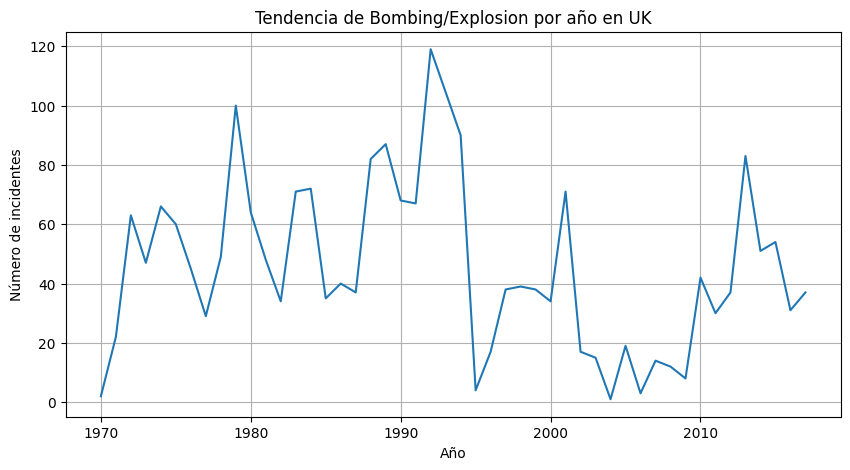

In [0]:
# Tendencia de ataques por bombas por año en UK 

import matplotlib.pyplot as plt

# Filtrar solo Bombing/Explosion en UK
uk_bomb = uk_df[uk_df['attacktype1_txt'] == 'Bombing/Explosion']

# Agrupar por año y contar incidentes
trend = uk_bomb.groupby('iyear').size().sort_index()

trend_pd = trend.to_pandas()  # Convertir a pandas para graficar con más opciones

plt.figure(figsize=(10,5))
trend_pd.plot(kind='line')  # Sin marker
plt.title('Tendencia de Bombing/Explosion por año en UK')
plt.xlabel('Año')
plt.ylabel('Número de incidentes')
plt.grid(True)
plt.show()

/databricks/python/lib/python3.12/site-packages/pyspark/pandas/utils.py:1054: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas Series is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


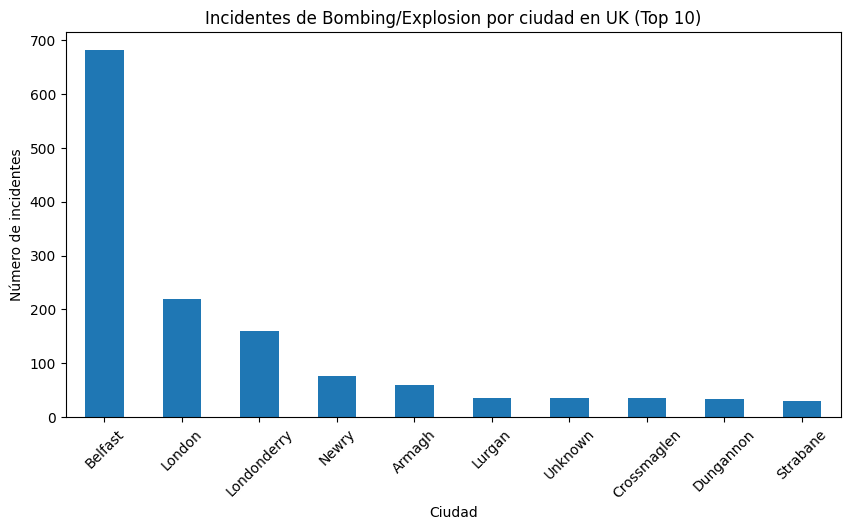

In [0]:
# Incidentes de Bombing/Explosion por ciudad (Top 10 )

# Contar incidentes por ciudad
city_counts = uk_bomb['city'].value_counts().head(10)

city_counts_pd = city_counts.to_pandas()

plt.figure(figsize=(10,5))
city_counts_pd.plot(kind='bar')
plt.title('Incidentes de Bombing/Explosion por ciudad en UK (Top 10)')
plt.xlabel('Ciudad')
plt.ylabel('Número de incidentes')
plt.xticks(rotation=45)
plt.show()

### Los incidentes se concentran en Belfast a principios de los 90's, vamos a ver la descripción de estos incidentes

In [0]:
# Filtrar los incidentes en Belfast entre 1990 y 1993
belfast_90s = uk_bomb[(uk_bomb['city'] == 'Belfast') & (uk_bomb['iyear'] >= 1990) & (uk_bomb['iyear'] <= 1993)]

# Seleccionar las columnas de interés
tabla_belfast = belfast_90s[['iyear', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt']]

# Mostrar la tabla
tabla_belfast.head(500)  

,iyear,attacktype1_txt,targtype1_txt,targsubtype1_txt
41170,1990,Bombing/Explosion,Military,Military Unit/Patrol/Convoy
41171,1990,Bombing/Explosion,Police,"Police Building (headquarters, station, school)"
41233,1990,Bombing/Explosion,Private Citizens & Property,"Public Area (garden, parking lot, garage, beac..."
41271,1990,Bombing/Explosion,Business,Entertainment/Cultural/Stadium/Casino
41295,1990,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square
41366,1990,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square
41409,1990,Bombing/Explosion,Airports & Aircraft,Airport
41410,1990,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square
41788,1990,Bombing/Explosion,Business,Industrial/Textiles/Factory
42116,1990,Bombing/Explosion,Police,"Police Building (headquarters, station, school)"


/databricks/python/lib/python3.12/site-packages/pyspark/pandas/utils.py:1054: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas Series is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


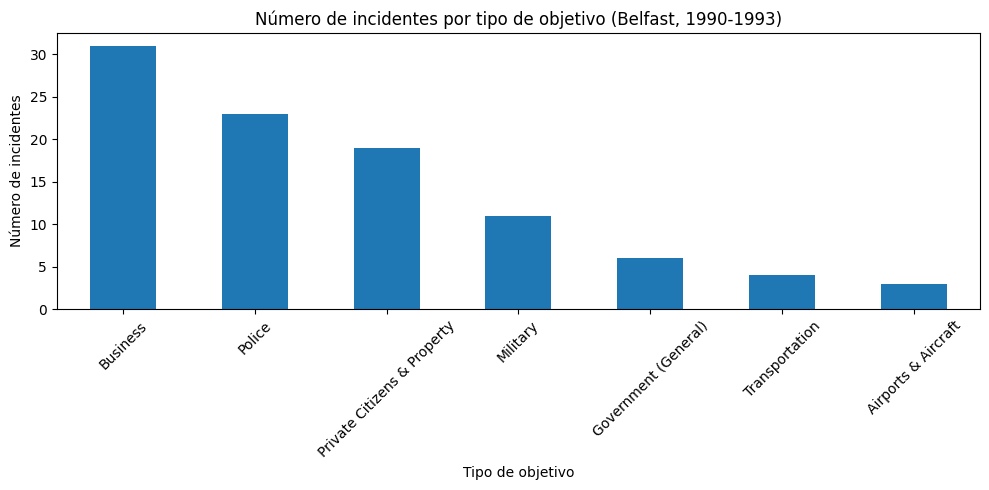

In [0]:
# Contar incidentes por tipo de objetivo
targets = tabla_belfast['targtype1_txt'].value_counts().to_pandas()

# Graficar
plt.figure(figsize=(10,5))
targets.plot(kind='bar')
plt.title('Número de incidentes por tipo de objetivo (Belfast, 1990-1993)')
plt.xlabel('Tipo de objetivo')
plt.ylabel('Número de incidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()